<a href="https://colab.research.google.com/github/avillamayordelgado/TFM/blob/main/Option_A_Arg_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import re
import numpy as np
from collections import defaultdict

path=r"/Supply and demand series_Time_by_rows.xlsx"
data=pd.read_excel(path)#,skiprows=range(3)


# Find the index of rows that match a specific expression using regular expressions
regex_pattern = r'^Argentina.*'  # Example regex pattern to match Argentina
indexes = data[data['Unnamed: 0'].str.contains(regex_pattern, regex=True, na=False)].index
indexes=list(indexes)
indexes.append(indexes[-1]+56)
print(indexes)

# Find the List of Items
regex_pattern = r'^Argentina - (.*)'  # Example regex pattern to match Argentina
# Extract the desired part using regular expressions
extracted_list = data.loc[data['Unnamed: 0'].str.contains(regex_pattern, regex=True, na=False), 'Unnamed: 0'].str.extract(regex_pattern, expand=False).to_list()
#print(extracted_list)

Dict=defaultdict(dict)

for i in range(len(extracted_list)):
    Dict[extracted_list[i]]=data[indexes[i]:indexes[i+1]]
    Dict[extracted_list[i]]=Dict[extracted_list[i]][1:]
    new_header = Dict[extracted_list[i]].iloc[0] #grab the first row for the header
    Dict[extracted_list[i]] = Dict[extracted_list[i]][1:] #take the data less the header row
    Dict[extracted_list[i]].columns = new_header #set the header row as the df header
    Dict[extracted_list[i]] = Dict[extracted_list[i]].reset_index(drop=True)
    Dict[extracted_list[i]]=Dict[extracted_list[i]].iloc[1:]
    Dict[extracted_list[i]]=Dict[extracted_list[i]].rename(columns={np.nan: 'Year'})


Dict[extracted_list[1]]

[2, 58, 114, 170, 226, 282, 338, 394, 450, 506, 562, 618, 674, 730, 786, 842, 898, 954, 1010, 1066, 1122, 1178, 1234, 1290, 1346, 1402, 1458]


<ipython-input-13-ced42a85ea28>:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  extracted_list = data.loc[data['Unnamed: 0'].str.contains(regex_pattern, regex=True, na=False), 'Unnamed: 0'].str.extract(regex_pattern, expand=False).to_list()


59,Year,Oil,Natural gas,Coal,Hydroenergy,Nuclear,Firewood,Sugarcane and products,Other Primary_x000D_\n,Total Primaries,...,Kerosene/jet fuel,Diesel oil,Fuel oil,Coke,Charcoal,Gases,Other secondary,Non-energy,Total Secundaries,Total
1,1970,14900.004012,NaN,6703.112811,NaN,NaN,NaN,NaN,NaN,21603.116823,...,NaN,5529.992964,1549.999036,67.999419,NaN,NaN,NaN,1259.99744,12537.989339,34141.106162
2,1971,22479.676435,NaN,6271.11843,NaN,NaN,NaN,NaN,NaN,28750.794865,...,516.074208,2131.496765,1351.992414,61.199477,NaN,NaN,NaN,1520.001758,10955.087492,39705.882356
3,1972,15359.798946,9179.663001,3967.148398,NaN,NaN,NaN,NaN,NaN,28506.610345,...,NaN,NaN,518.621966,81.599303,NaN,NaN,NaN,479.998364,4990.225624,33496.835969
4,1973,30039.973223,14508.183477,6847.110937,NaN,NaN,NaN,NaN,NaN,51395.267638,...,349.342541,930.902414,3982.234841,20.399826,NaN,NaN,NaN,10.006038,9659.516031,61054.783668
5,1974,30350.940204,14109.789423,7970.296328,NaN,NaN,NaN,NaN,NaN,52431.025955,...,NaN,1165.796746,740.880225,20.399826,NaN,NaN,NaN,30.004235,7171.386078,59602.412033
6,1975,21999.858604,14217.687812,11325.452686,NaN,NaN,NaN,NaN,NaN,47542.999103,...,498.871735,4785.195477,NaN,142.79878,NaN,NaN,NaN,350.003144,11494.333682,59037.332785
7,1976,31189.56609,17263.742352,7322.304756,NaN,NaN,NaN,NaN,NaN,55775.613199,...,NaN,4349.994541,898.312553,163.198605,NaN,NaN,NaN,379.9935,10001.28496,65776.898159
8,1977,30209.991958,18882.218198,9662.27432,NaN,NaN,NaN,NaN,NaN,58754.484476,...,NaN,5133.003632,NaN,231.198024,NaN,NaN,NaN,210.001886,8374.422893,67128.907369
9,1978,21920.006223,20160.399122,7149.507004,NaN,NaN,NaN,NaN,NaN,49229.91235,...,283.179181,1557.301292,NaN,258.397792,NaN,NaN,NaN,260.004318,6581.272203,55811.184552
10,1979,17779.994456,16682.751023,8323.091739,NaN,NaN,NaN,NaN,NaN,42785.837219,...,2072.236437,8430.059283,NaN,448.796164,NaN,NaN,NaN,120.00306,18902.074467,61687.911685


float64


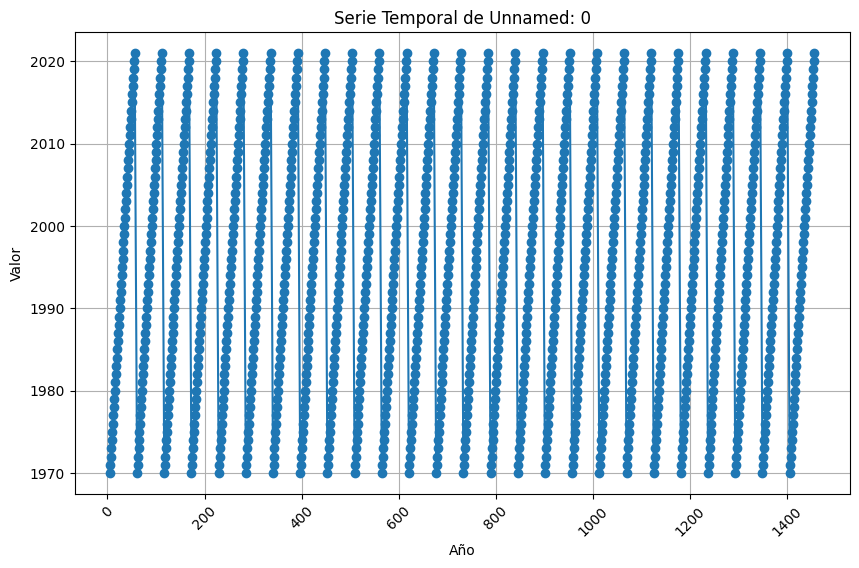

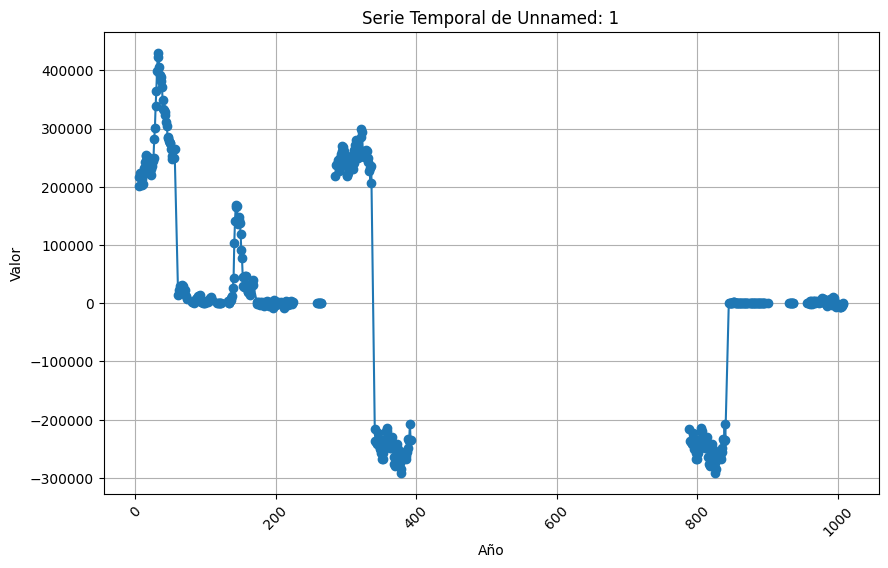

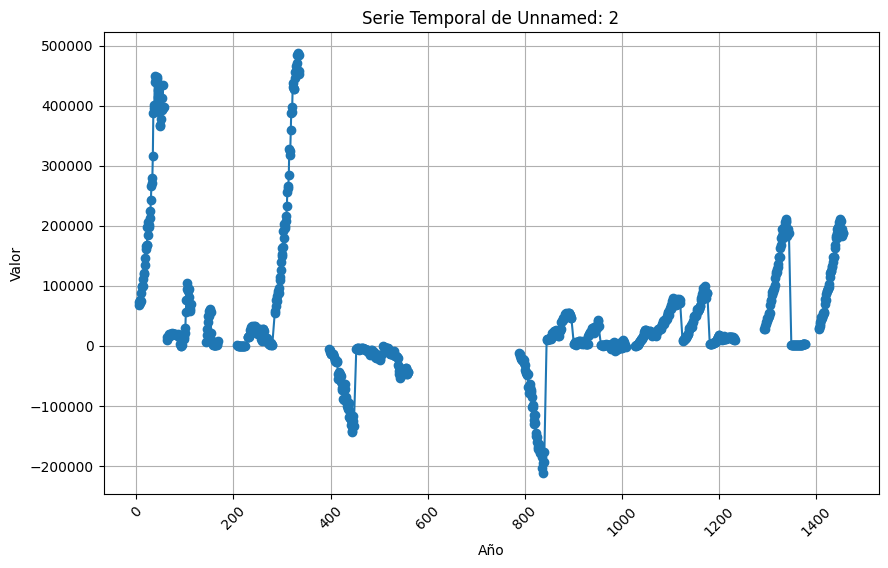

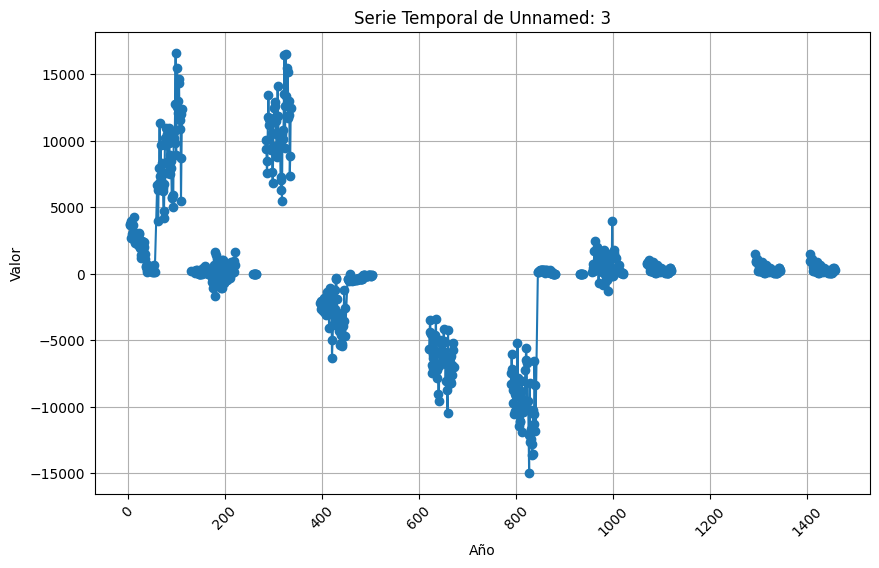

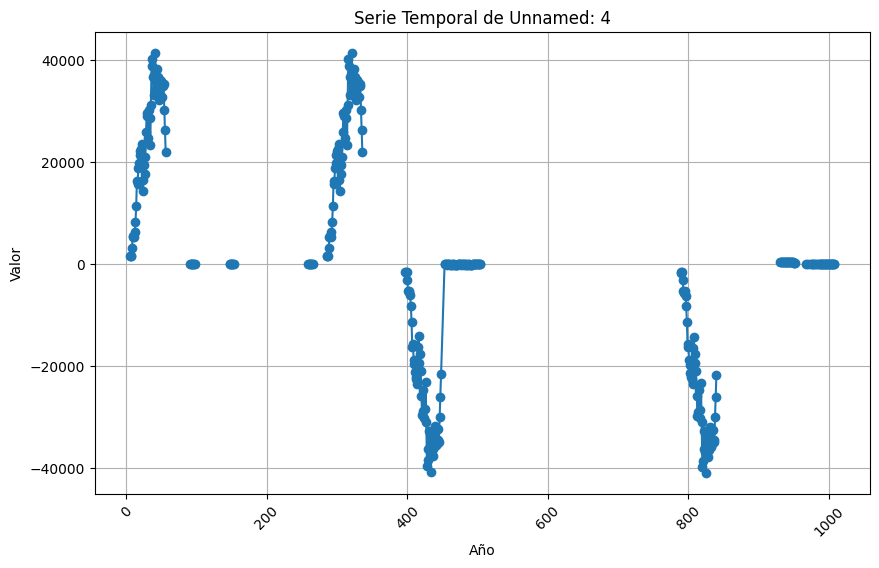

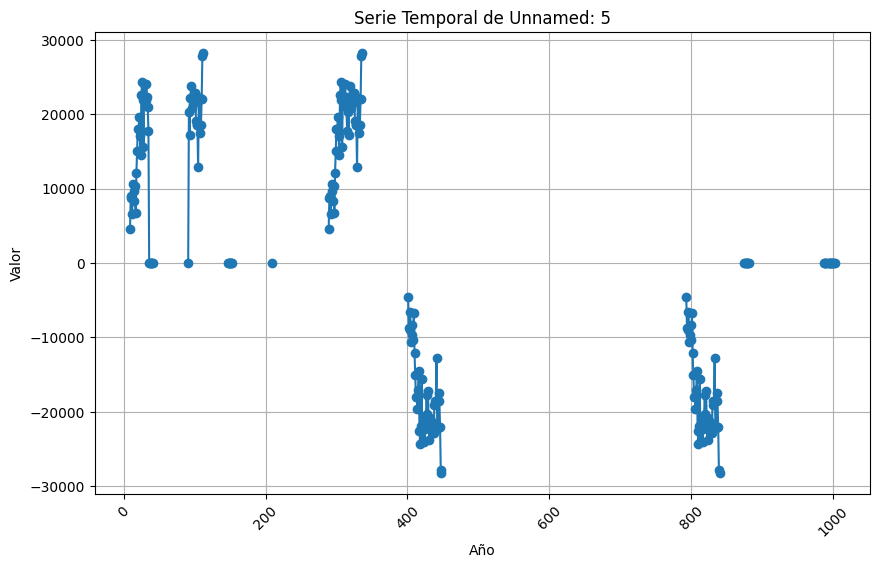

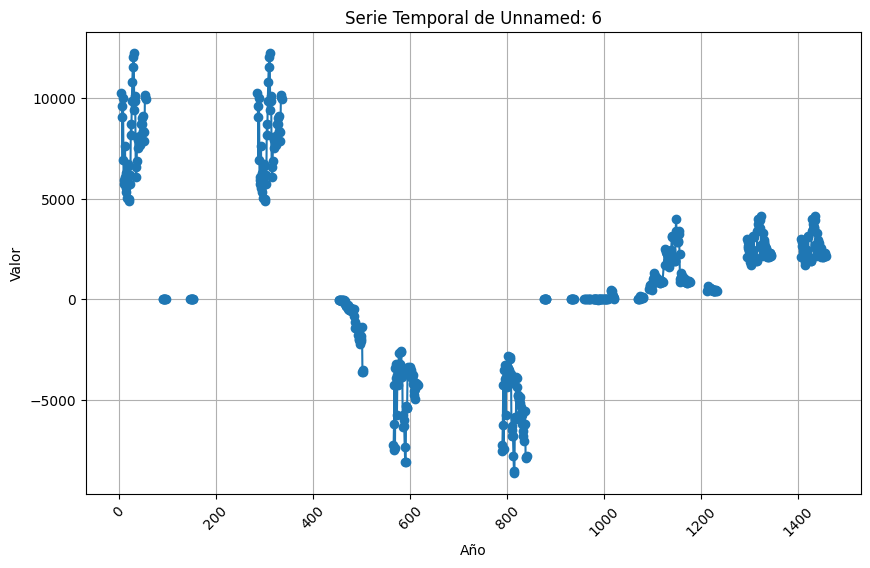

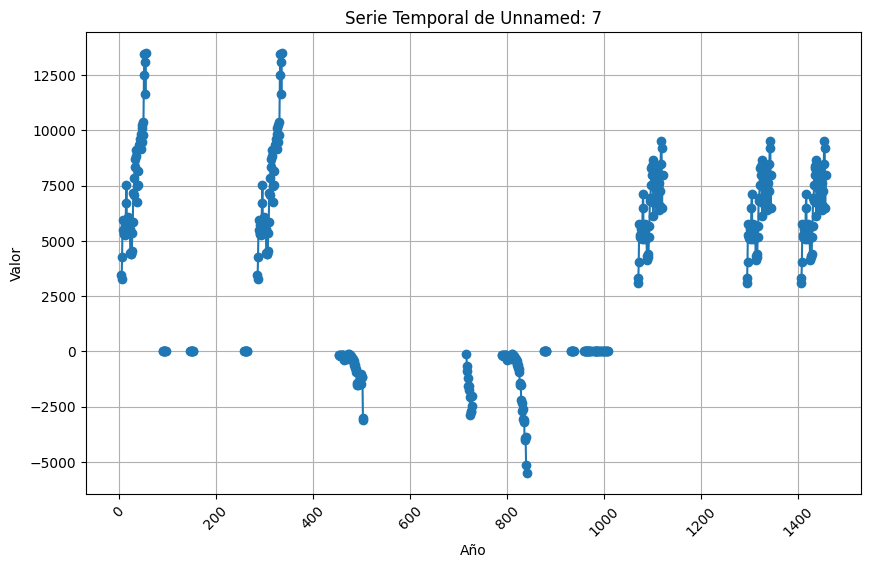

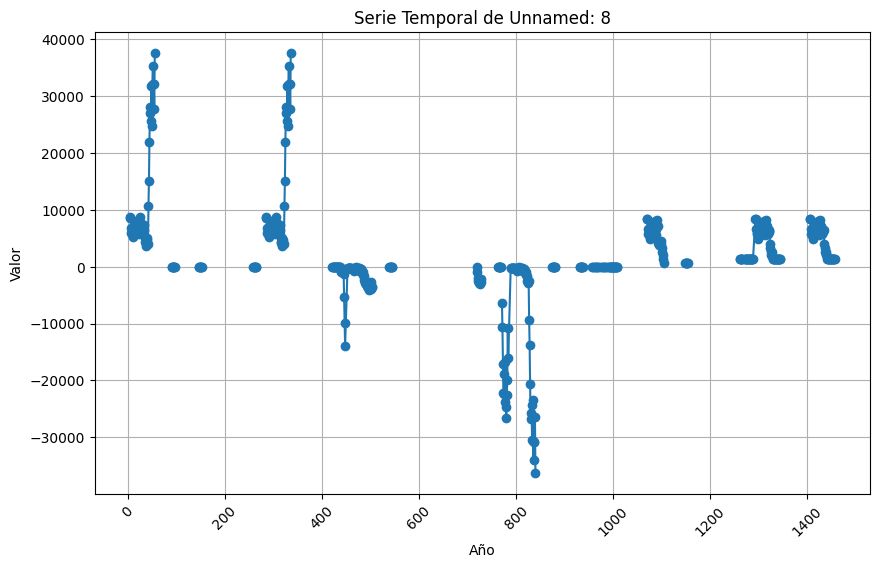

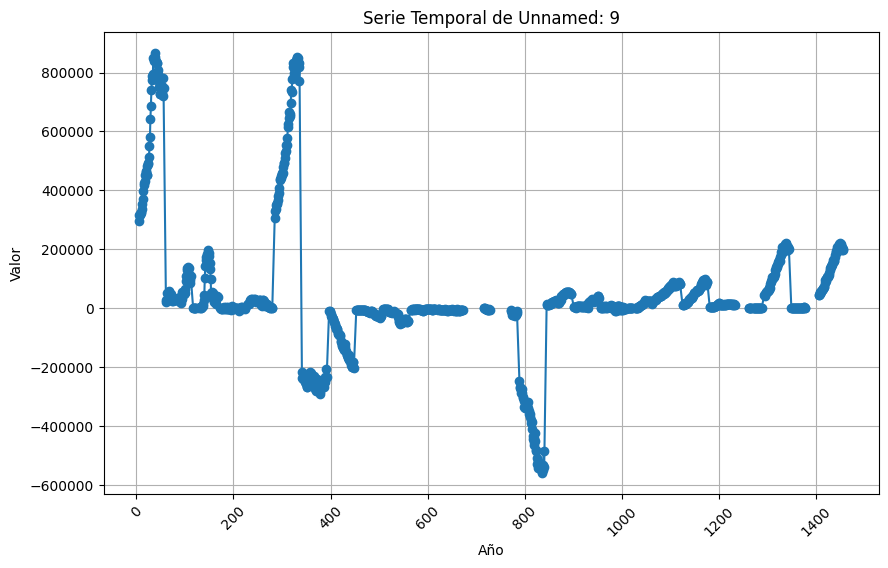

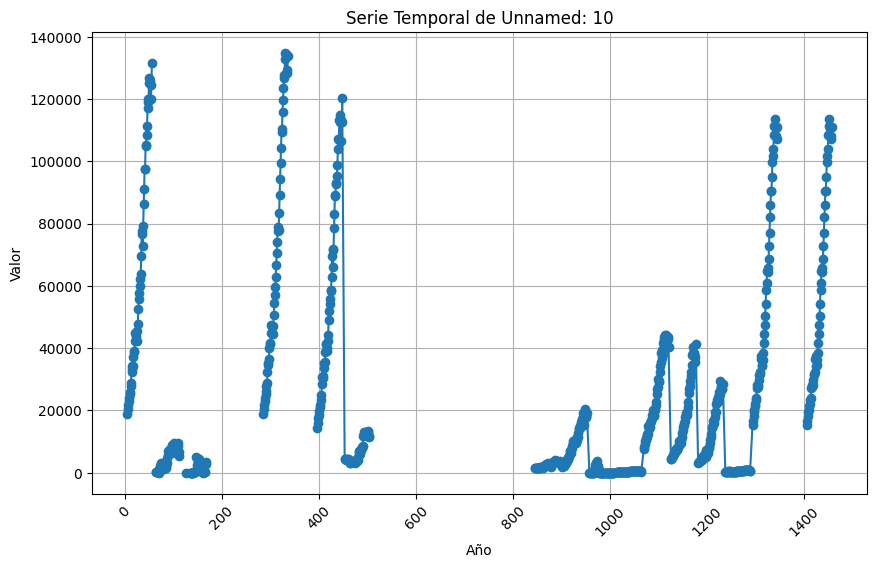

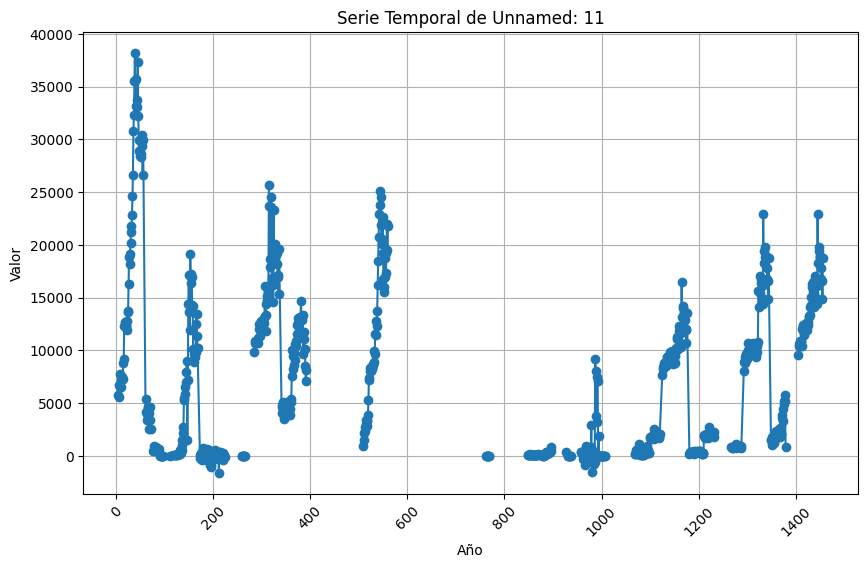

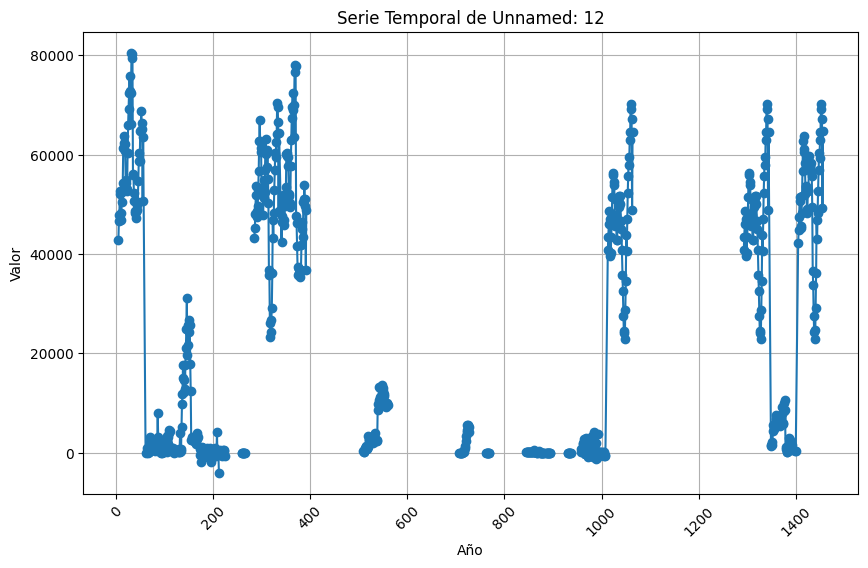

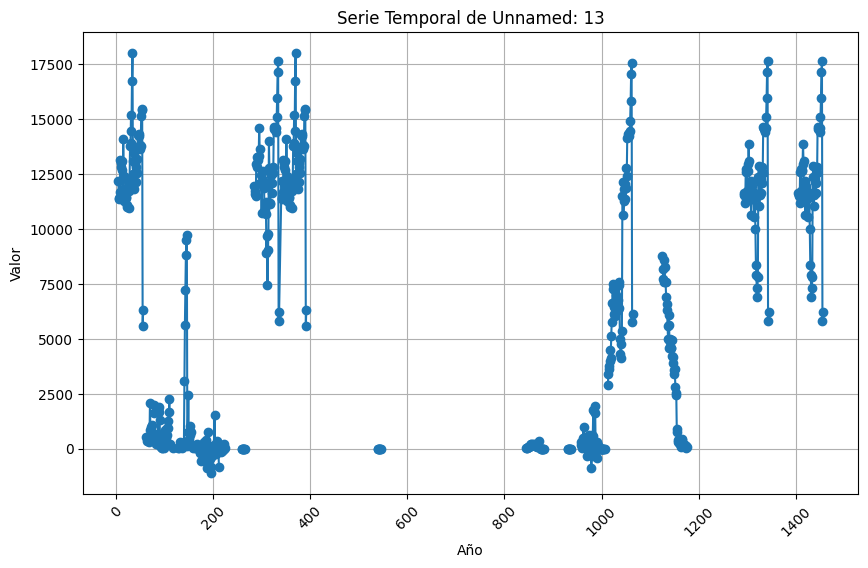

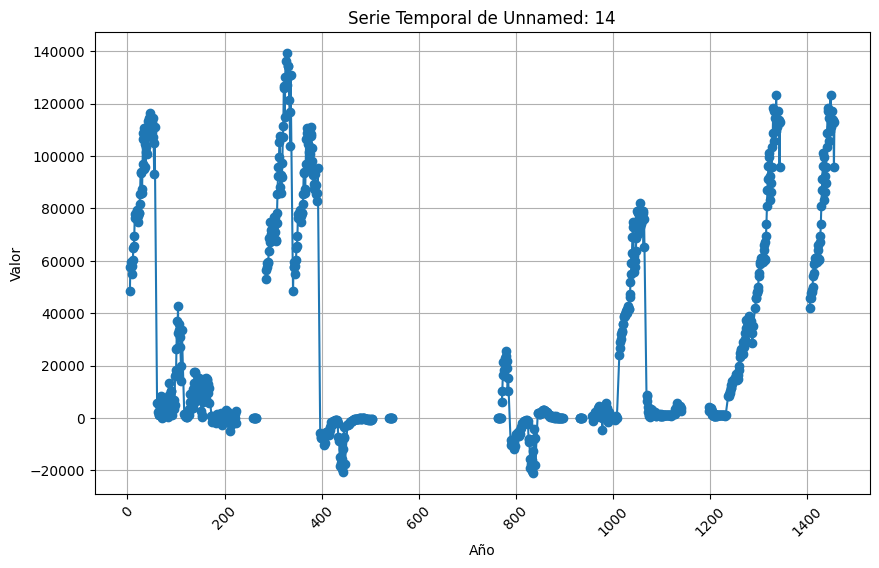

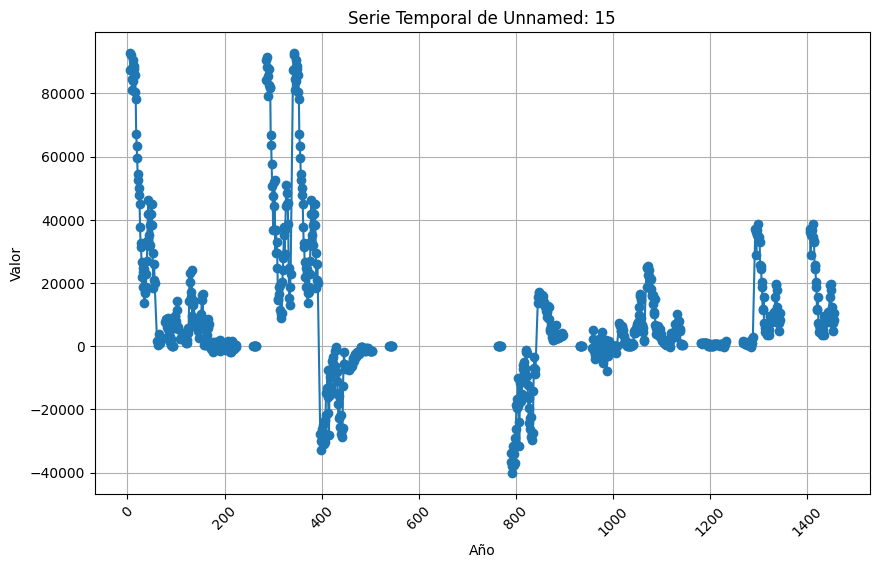

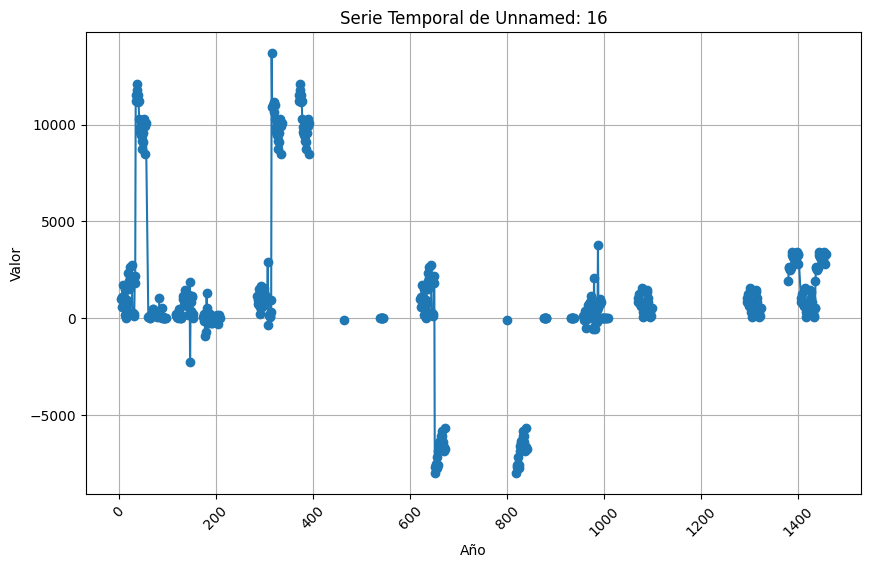

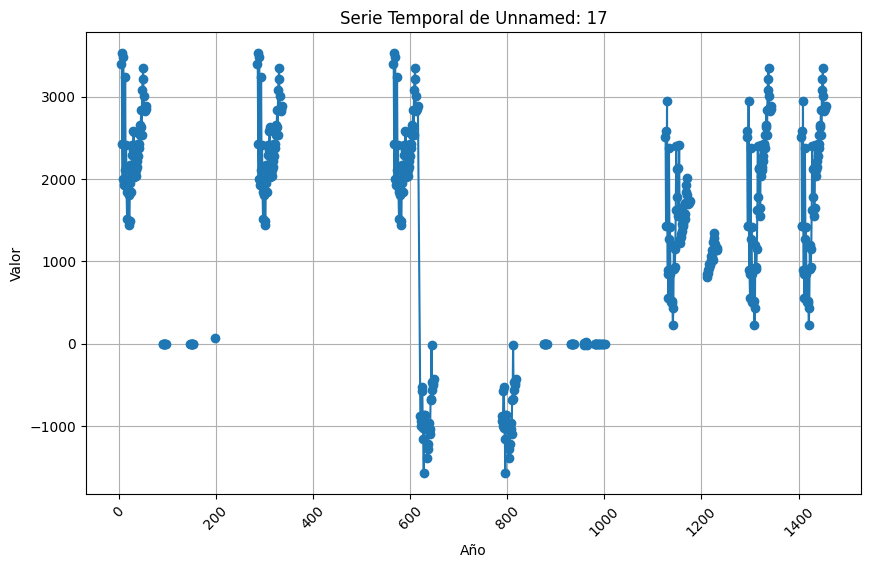

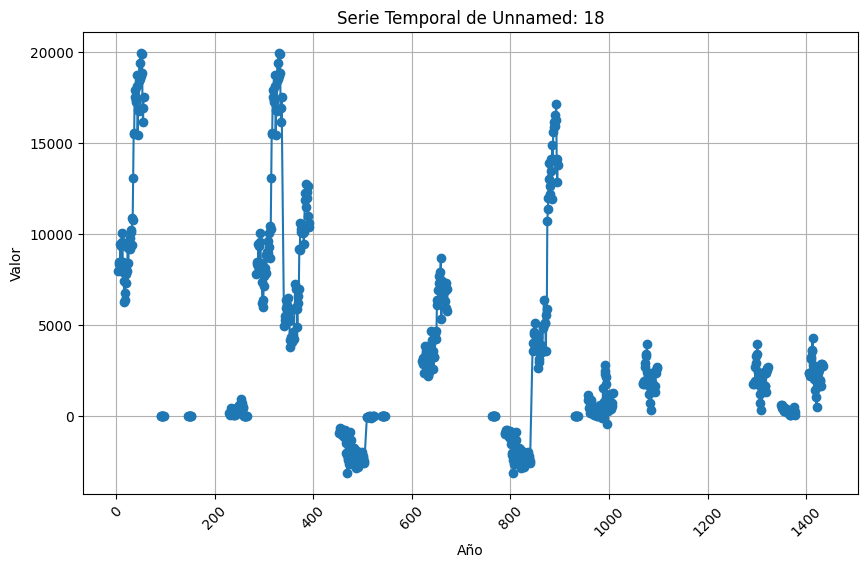

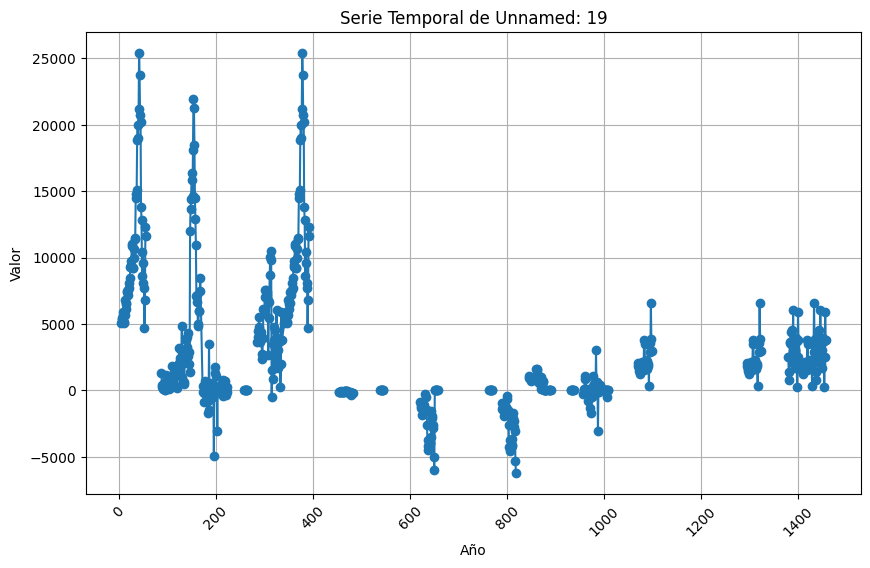

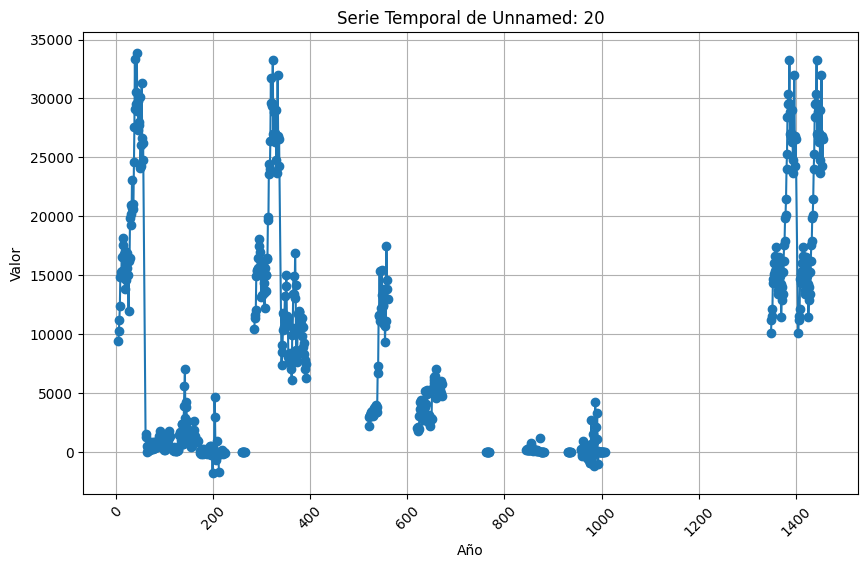

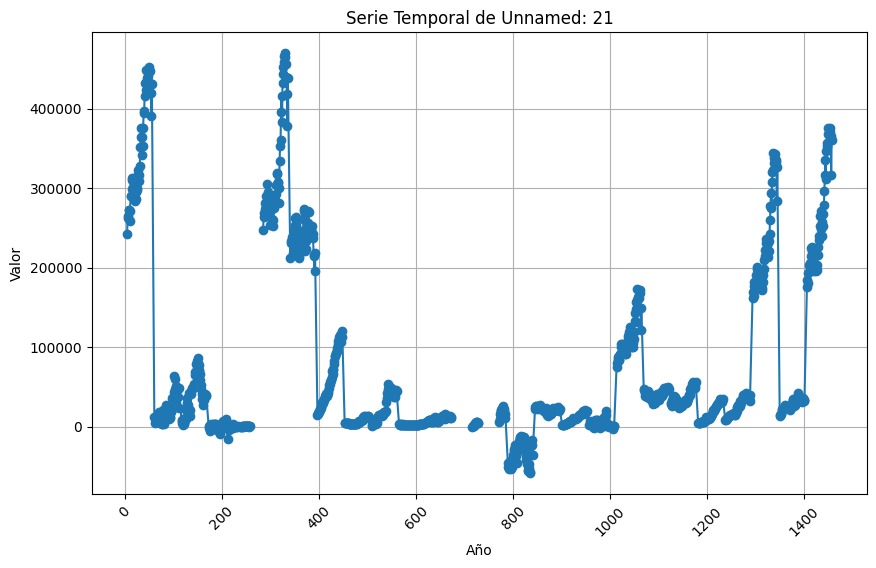

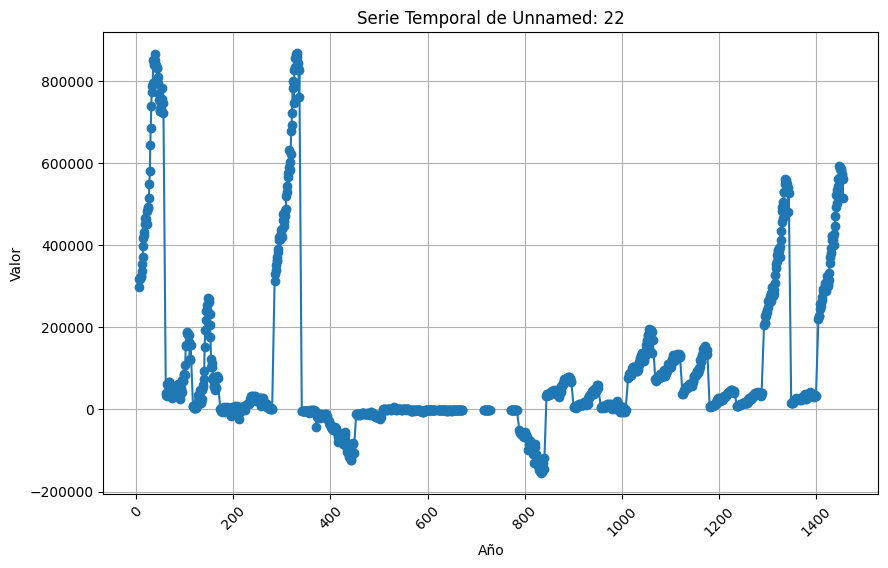

AttributeError: ignored

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Supongamos que ya tienes los datos cargados en un DataFrame llamado "data"
# Convierte la columna a numérica (si los valores son str)
data[columna] = pd.to_numeric(data[columna], errors='coerce')

# Elimina valores faltantes (NaN)
data.dropna(subset=[columna], inplace=True)

# Verifica que la columna contenga solo valores numéricos
print(data[columna].dtype)
# 1. Graficar las series temporales
for columna in data.columns:
    plt.figure(figsize=(10, 6))
    plt.plot(data.index, data[columna], marker='o')
    plt.xlabel('Año')
    plt.ylabel('Valor')
    plt.title(f'Serie Temporal de {columna}')
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# 2. Realizar proyecciones hasta el año 2040 para cada columna
proyecciones_dict = {}

for columna in data.columns:
    # Ajustar un modelo de regresión lineal
    model = LinearRegression()
    X = data.index.year.reshape(-1, 1)
    y = data[columna]
    model.fit(X, y)

    # Realizar proyecciones futuras hasta 2040
    proyeccion_index = pd.date_range(start=data.index[-1], end='2040', freq='Y')
    proyeccion_X = proyeccion_index.year.reshape(-1, 1)
    proyecciones = model.predict(proyeccion_X)

    # Crear DataFrame para las proyecciones
    proyeccion_df = pd.DataFrame({columna: proyecciones}, index=proyeccion_index)

    # Unir datos históricos con proyecciones futuras
    serie_completa = pd.concat([data[columna], proyeccion_df])

    # Agregar la serie completa al diccionario de proyecciones
    proyecciones_dict[columna] = serie_completa

# Proyecciones almacenadas en el diccionario "proyecciones_dict"
# ...

